In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections  
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
url = f"https://api.opendota.com/api/teams"
response = requests.get(url)
teams_data = response.json()

In [3]:
ts_id = []
for teams in teams_data: 
    if teams['name'] == 'Team Spirit': 
        ts_id = teams['team_id']
        print(ts_id)

7119388


In [4]:
def team_info(ts_id):
    url = f"https://api.opendota.com/api/teams/{ts_id}"
    response = requests.get(url)
    return response.json()

In [5]:
def win_rate(ts_id):
    team_data = team_info(ts_id)
    wins = team_data['wins']
    losses = team_data['losses']
    total = wins + losses
    win_rate = (wins / total) * 100 if total > 0 else 0
    return round(win_rate, 1)
print(f"Team Spirit has a winrate of {win_rate(ts_id)}%")

Team Falcons has a winrate of 59.0%


In [6]:
def get_matches(ts_id):
    url = f"https://api.opendota.com/api/teams/{ts_id}/matches"
    response = requests.get(url)
    matches = response.json()
    return matches[:4]

In [7]:
matches = get_matches(ts_id)

In [8]:
def format_duration(duration):
    hours = duration // 3600             
    minutes = (duration % 3600) // 60    
    seconds = duration % 60    
    if hours > 0:
        return f"{hours}h {minutes}m {seconds}s"
    else:
        return f"{minutes}m {seconds}s"

In [9]:
def team_side(match):
    if match['radiant']:
        return True  
    else:
        return False

In [10]:
match_results = []
for match in matches:
    is_radiant = team_side(match)
    if (is_radiant and match['radiant_win']) or (not is_radiant and not match['radiant_win']):
        match_results.append(1) 
    else:
        match_results.append(0)
    duration_formatted = format_duration(match['duration'])
    print(f"Result: {match_results}, Duration: {duration_formatted}")

Result: [1], Duration: 1h 2m 50s
Result: [1, 1], Duration: 43m 27s
Result: [1, 1, 0], Duration: 36m 11s
Result: [1, 1, 0, 1], Duration: 33m 10s


In [11]:
for match in matches:
    is_radiant = team_side(match)
    if (is_radiant and match['radiant_win']) or (not is_radiant and not match['radiant_win']):
        result = 'Win'
    else:
        result = 'Lose'
    duration_formatted = format_duration(match['duration'])
    print(f"Result: {result}, Duration: {duration_formatted}")

Result: Win, Duration: 1h 2m 50s
Result: Win, Duration: 43m 27s
Result: Lose, Duration: 36m 11s
Result: Win, Duration: 33m 10s


In [12]:
match_ids = []
for match in matches:
    match_ids.append(match['match_id']) 

In [13]:
count = 0
count1 = 1
total_kils = 0

for match in matches:
    is_radiant = team_side(match)
    radiant_score = match['radiant_score']
    dire_score = match['dire_score']
    total_score_match = radiant_score + dire_score
    total_kils += total_score_match 
    print(f"{count1} Match has {total_score_match} kills")
    if is_radiant == True:
        print(f"Falcons have {radiant_score} kills")
        print(f"The other team has {dire_score} kills")
    
    elif is_radiant == False:
        print(f"Falcons have {dire_score} kills")
        print(f"The other team has {radiant_score} kills")

    count += 1
    count1 += 1
    
mean = (total_kils/count)
print(f"The mean kill at last matches was {mean} kils")
print(f"The number os totals kills was {total_kils}")

1 Match has 51 kills
Falcons have 26 kills
The other team has 25 kills
2 Match has 41 kills
Falcons have 28 kills
The other team has 13 kills
3 Match has 41 kills
Falcons have 17 kills
The other team has 24 kills
4 Match has 50 kills
Falcons have 33 kills
The other team has 17 kills
The mean kill at last matches was 45.75 kils
The number os totals kills was 183


In [14]:
total_duration = 0
for match in matches:
    total_duration += match['duration']  
mean = total_duration / 4
print(f"The total duration time of the matches was {format_duration(total_duration)}")  
print(f"The average duration time of each match was {format_duration(mean)}")  

The total duration time of the matches was 2h 55m 38s
The average duration time of each match was 43.0m 54.5s


In [15]:
def get_match_detail(match_ids):
    url = f"https://api.opendota.com/api/matches/{match_id}"
    response = requests.get(url)
    return response.json()

In [18]:
url = f'https://api.opendota.com/api/teams/{ts_id}/players'
response = requests.get(url) 
players1 = response.json()
players_name = []
for player in players1:
    account_id = player.get('name')
    in_team = player.get("is_current_team_member")
    if account_id and in_team == True:
        players_name.append(account_id)

In [19]:
mean_kda = {player_name: [] for player_name in players_name} 
mean_kills = {player_name: [] for player_name in players_name} 
mean_deaths = {player_name: [] for player_name in players_name} 
mean_assists = {player_name: [] for player_name in players_name} 

for match_id in match_ids:
    match_data = get_match_detail(match_id)
    players = match_data['players']
    
    for player in players:
        player_name = player.get('name', 'Unknown')
        if player_name in players_name:
            kills = player['kills']
            deaths = player['deaths']
            assists = player['assists']
            kda = (kills + assists) / (deaths if deaths > 0 else 1) 

            mean_kda[player_name].append(kda)
            mean_kills[player_name].append(kills)
            mean_deaths[player_name].append(deaths)
            mean_assists[player_name].append(assists)


for player_name in players_name:
    kda_lista = mean_kda[player_name]
    kills_lista = mean_kills[player_name]
    deaths_lista = mean_deaths[player_name]
    assists_lista = mean_assists[player_name]
    
    kda_medio = sum(kda_lista) / len(kda_lista) if kda_lista else 0
    kills_medio = sum(kills_lista) / len(kills_lista) if kills_lista else 0
    deaths_medio = sum(deaths_lista) / len(deaths_lista) if deaths_lista else 0
    assists_medio = sum(assists_lista) / len(assists_lista) if assists_lista else 0
    
    if kda_medio > 0:    
        print(f"The player {player_name} has an average KDA of {kda_medio:.2f}.")
        print(f" - Average kills: {kills_medio:.2f}")
        print(f" - Average deaths: {deaths_medio:.2f}")
        print(f" - Average assists: {assists_medio:.2f}")

The player Miposhka has an average KDA of 5.80.
 - Average kills: 2.75
 - Average deaths: 3.75
 - Average assists: 15.75
The player Larl has an average KDA of 8.28.
 - Average kills: 6.25
 - Average deaths: 4.00
 - Average assists: 12.75
The player Malik has an average KDA of 7.26.
 - Average kills: 4.25
 - Average deaths: 3.75
 - Average assists: 13.00
The player Satanic has an average KDA of 10.94.
 - Average kills: 8.75
 - Average deaths: 2.50
 - Average assists: 6.75
The player rue has an average KDA of 4.33.
 - Average kills: 4.00
 - Average deaths: 6.00
 - Average assists: 14.75


In [20]:
def get_hero_mapping():
    url = "https://api.opendota.com/api/heroes"
    response = requests.get(url)
    heroes_data = response.json()
    
    hero_mapping = {hero['id']: hero['localized_name'] for hero in heroes_data}
    return hero_mapping

hero_mapping = get_hero_mapping()

In [21]:
hero_counter = collections.Counter()

for match_id in match_ids:
    match_data = get_match_detail(match_id)
    players = match_data['players']
    
    for player in players:
        hero_id = player['hero_id']
        hero_counter[hero_id] += 1

top_heroes = hero_counter.most_common(5)

print("Heroes that appeared most in recent matches:")
for hero_id, count in top_heroes:
    hero_name = hero_mapping.get(hero_id, "Unknown")
    print(f"Hero {hero_name} appeared {count} times.")

Heroes that appeared most in recent matches:
Hero Muerta appeared 3 times.
Hero Hoodwink appeared 3 times.
Hero Primal Beast appeared 3 times.
Hero Dragon Knight appeared 3 times.
Hero Phoenix appeared 3 times.


In [22]:
data = []

for player_name in players_name:
    for i, kda in enumerate(mean_kda[player_name]):
        data.append({
            'match_id': match_ids[i],
            'player_name': player_name,
            'kda': kda,
            'kills': mean_kills[player_name][i],
            'deaths': mean_deaths[player_name][i],
            'assists': mean_assists[player_name][i]
        })

df = pd.DataFrame(data)

In [23]:
df

,match_id,player_name,kda,kills,deaths,assists
0,8017398362,Miposhka,4.500000,3,4,15
1,8017283095,Miposhka,11.500000,1,2,22
2,8017189664,Miposhka,3.000000,5,4,7
3,8015935909,Miposhka,4.200000,2,5,19
4,8017398362,Larl,2.857143,8,7,12
5,8017283095,Larl,4.600000,4,5,19
6,8017189664,Larl,3.666667,4,3,7
7,8015935909,Larl,22.000000,9,1,13
8,8017398362,Malik,18.000000,7,1,11
9,8017283095,Malik,4.250000,6,4,11


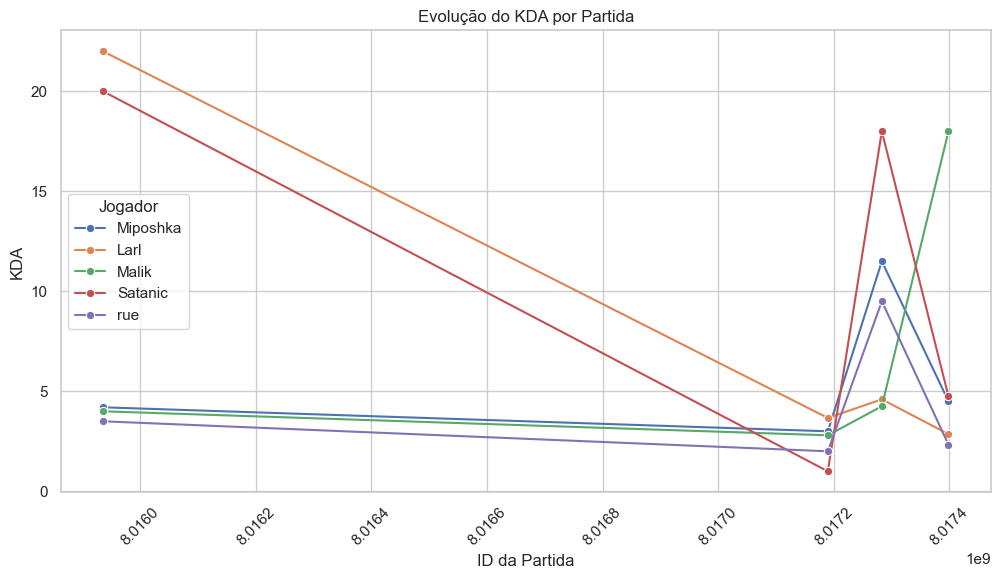

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='match_id', y='kda', hue='player_name', marker='o')

plt.title("Evolução do KDA por Partida")
plt.xlabel("ID da Partida")
plt.ylabel("KDA")
plt.legend(title="Jogador")
plt.xticks(rotation=45)
plt.show()

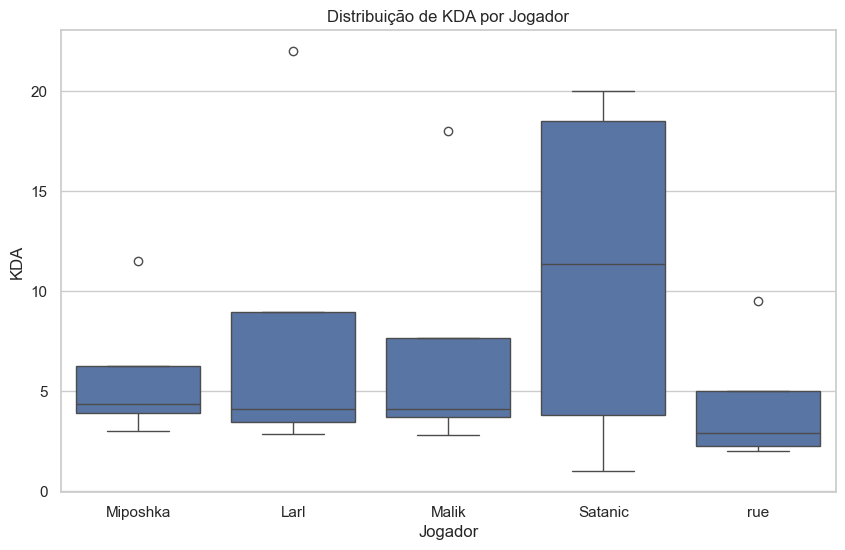

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='player_name', y='kda')
plt.title("Distribuição de KDA por Jogador")
plt.xlabel("Jogador")
plt.ylabel("KDA")
plt.show()

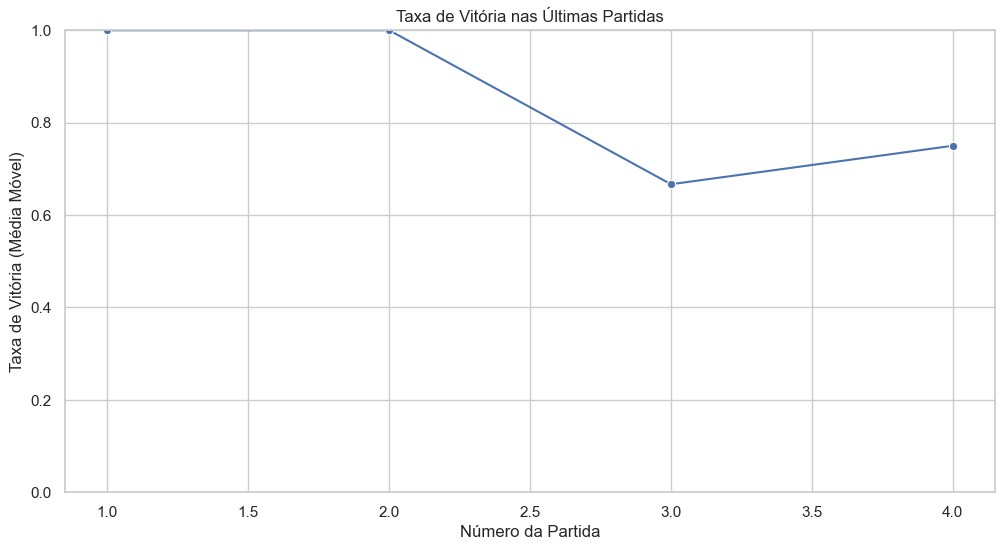

In [26]:
df = pd.DataFrame({'win_result': match_results})
df['match_number'] = range(1, len(df) + 1) 
df['moving_win_rate'] = df['win_result'].rolling(window=5, min_periods=1).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='match_number', y='moving_win_rate', marker='o', color='b')
plt.title("Taxa de Vitória nas Últimas Partidas")
plt.xlabel("Número da Partida")
plt.ylabel("Taxa de Vitória (Média Móvel)")
plt.ylim(0, 1)
plt.show()